In [39]:
!pip install scipy

  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)


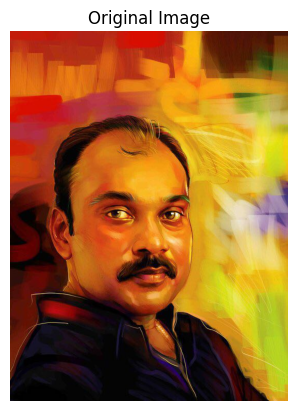

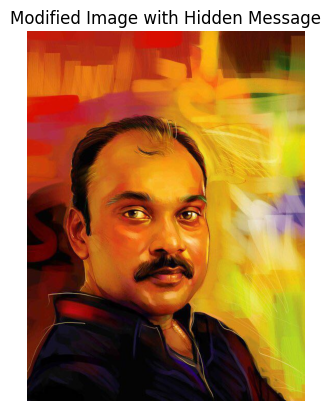

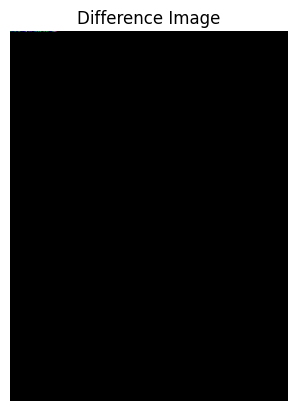

Secret Message: This is a robust secret message.
ØÐ«o¶Ò?%úè	Ûç>ù`'ÞdØK3*Ýµ)MHx?ÃÎä8öÅöþ+(q«(xøFÌZ^T(×°nÊB5,e|QÀ(	îußy¯õr 3aÀ V!y~ÙÝ¿X\4®!Íd¿Ü ÿ?Vndª Å¼!!z>ÈSS3ä;6ÚJ^NÇðQ¸Û8×Þ0¤=`	§ðóþø(3rÇÑ2)IBï©M@²É{QÌïWz.±V-´r×[¦_,({käñVöc9ßhG}AÊ77ÝD¥ÅcÉ9²ÿè¯³yOÞaõ«ÌÞ±Ú5ìôrÎ\S7x7ö/y')@.Æ4lAüiõ©¶úLL ~#ÐU~¤q¬#²Ö÷09ôJ »­/åáIÒDsrõÓC2vôÀü?þ«×éoÄªº~¹-} ÕR8ä9ºÁ¨HZc×tªëÇÈõ0Í-çp÷[ üÖÛÆ&{»ÙÃñ`D,ÔØÄ;n`¨çw]â7 Õ»ÓÌ¢Ú@+ÕHÔàkWHZÐQÔç¿Sÿ>#TÕiËöHEà.GPÔV¾#²Q~U,Ë¸Ç¯ÿÁÔJBÛ]´Ç¹ ËÀmÖ3cAsY}§âæ¾ÜèáÌ	Ø~a¹*¶sÎßØ»¶K~7uªÉP.+e_SÆ]¯c¢þ¹<e°Àzeüüh¢Ï(ìr­_¡uöâþ¹Ç|öá/¬S1k­¼±î.äVÈRú!

¶l<vª2±ÿ¶-MWÎ1Þ7svZedZíÖnyG×W-<4vh×µ
âÅg0g»IÒm"A@è:sÀÙ¨`!ú8Ûµ wU_ÓÆ?¯l>òG£º)Æ f~§Ãx¸§~Îß£¡Å×EËö»?5:ï}@IóMk¹õeáë0:ÊÒS+»q«n<ÈCÑI)Èá7Ñ8{Ò w¥&{)wøîxr¼7³(Å¯CÆéààQEàmJ÷üSài²C/Õn1îïµMw¦C1sM6¦È<÷´2ÚP
Ô±M.¢$j^ñ·Ñ}=x°VË.£ìAÜÐ!Õ2íáì²ZL

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

def read_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    return image

def display_image(image, title='Image'):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

def message_to_binary(message):
    return ''.join(format(ord(char), '08b') for char in message)

def binary_to_message(binary):
    chars = [binary[i:i+8] for i in range(0, len(binary), 8)]
    return ''.join(chr(int(char, 2)) for char in chars)

def embed_message(image, message):
    binary_message = message_to_binary(message) + '1111111111111110'  # Delimiter
    data_index = 0
    message_length = len(binary_message)
    
    for row in image:
        for pixel in row:
            for channel in range(3):  # RGB channels
                if data_index < message_length:
                    pixel[channel] = int(format(pixel[channel], '08b')[:-1] + binary_message[data_index], 2)
                    data_index += 1
                else:
                    break
            if data_index >= message_length:
                break
        if data_index >= message_length:
            break
    return image

def extract_message(image):
    binary_message = ''
    for row in image:
        for pixel in row:
            for channel in range(3):  # RGB channels
                binary_message += format(pixel[channel], '08b')[-1]
                if binary_message[-16:] == '1111111111111110':  # Delimiter
                    return binary_to_message(binary_message[:-16])
    return binary_to_message(binary_message)

def display_difference(original_image, modified_image, title='Difference Image'):
    difference = np.abs(original_image - modified_image)
    plt.imshow(difference)
    plt.title(title)
    plt.axis('off')
    plt.show()

def run_steganography(image_path, secret_message):
    # Read the original image
    original_image = read_image(image_path)
    
    # Embed the secret message
    modified_image = embed_message(original_image.copy(), secret_message)
    
    # Simulate scanning by adding noise
    scanned_image = modified_image + np.random.randint(0, 10, modified_image.shape, dtype='uint8')
    scanned_image = np.clip(scanned_image, 0, 255)  # Ensure values are valid

    # Extract the message from the scanned image
    extracted_message = extract_message(scanned_image)
    
    # Display the images
    display_image(original_image, title='Original Image')
    display_image(modified_image, title='Modified Image with Hidden Message')
    display_difference(original_image, modified_image, title='Difference Image')
    
    print(f"Secret Message: {secret_message}")
    print(f"Extracted Message: {extracted_message}")

# Example usage
image_path = "/home/shri123/projects/art_scanner/test.PNG"
secret_message = 'This is a robust secret message.'
run_steganography(image_path, secret_message)





In [45]:
pip install ImageFilter

  ERROR: Command errored out with exit status 1:
   command: /home/shri123/projects/freelancer_auto/server/myenv/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-v_v72f_a/ImageFilter/setup.py'"'"'; __file__='"'"'/tmp/pip-install-v_v72f_a/ImageFilter/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-ydsa3hfy
       cwd: /tmp/pip-install-v_v72f_a/ImageFilter/
  Complete output (6 lines):
  usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
     or: setup.py --help [cmd1 cmd2 ...]
     or: setup.py --help-commands
     or: setup.py cmd --help
  
  error: invalid command 'bdist_wheel'
  ----------------------------------------
  ERROR: Failed building wheel for ImageFilter
  Running setup.py clean for ImageFilter
Failed to build ImageFilter
    Running setup.py install for ImageFi

In [2]:
from PIL import Image
import numpy as np

def text_to_bits(text):
    return ''.join(f'{ord(c):08b}' for c in text)

def bits_to_text(bits):
    return ''.join(chr(int(bits[i:i+8], 2)) for i in range(0, len(bits), 8))

def embed_message(image, message):
    image = image.convert('RGB')
    np_image = np.array(image)
    message_bits = text_to_bits(message)
    message_len = len(message_bits)
    
    idx = 0
    for i in range(np_image.shape[0]):
        for j in range(np_image.shape[1]):
            if idx < message_len:
                r, g, b = np_image[i, j]
                r = (r & ~1) | int(message_bits[idx])
                g = (g & ~1) | int(message_bits[idx + 1]) if idx + 1 < message_len else g
                b = (b & ~1) | int(message_bits[idx + 2]) if idx + 2 < message_len else b
                np_image[i, j] = (r, g, b)
                idx += 3
            else:
                break
        if idx >= message_len:
            break

    return Image.fromarray(np_image)

def extract_message(image, message_len):
    image = image.convert('RGB')
    np_image = np.array(image)
    message_bits = []
    
    idx = 0
    total_bits = message_len * 8
    for i in range(np_image.shape[0]):
        for j in range(np_image.shape[1]):
            if idx < total_bits:
                r, g, b = np_image[i, j]
                message_bits.append(r & 1)
                message_bits.append(g & 1 if idx + 1 < total_bits else 0)
                message_bits.append(b & 1 if idx + 2 < total_bits else 0)
                idx += 3
            else:
                break
        if idx >= total_bits:
            break

    message_bits = ''.join(map(str, message_bits[:total_bits]))
    return bits_to_text(message_bits)

# Load your image
image = Image.open('/home/shri123/projects/art_scanner/test.PNG')

# Secret message
secret_message = "This is a robust secret message."

# Embed the message into the image
encoded_image = embed_message(image, secret_message)

# Save the encoded image
encoded_image.save('encoded_image.png')

# Simulate scanning by introducing noise and blurring
scanned_image = encoded_image.filter(ImageFilter.GaussianBlur(1))
scanned_image = scanned_image.point(lambda p: p * 0.9)

# Extract the message from the "scanned" image
retrieved_message = extract_message(scanned_image, len(secret_message))

print("Retrieved message:", retrieved_message)


NameError: name 'ImageFilter' is not defined